# import libraries

In [ ]:
from glob import glob
import cv2
from matplotlib import pyplot as plt
import numpy as np
from keras.applications.densenet import DenseNet169
from sklearn.model_selection import cross_validate, KFold, cross_val_predict, train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

# Get Dataset

Download dataset first time and save to google drive


In [ ]:
drive.mount('/content/drive')
# ! wget -P /content/drive/MyDrive https://github.com/muhammedtalo/COVID-19/archive/refs/heads/master.zip
# ! unzip -q /content/drive/MyDrive/master.zip -d /content/drive/MyDrive/Dataset

run this cell when dataset exist in google drive

In [ ]:
drive.mount('/content/drive')

# Load Data

load images directory

In [ ]:
images_path = {}
images_path["Covid"] = glob("/content/drive/MyDrive/Source/DeepLearning/CovidDetection/Dataset/COVID-19-master/X-Ray Image DataSet/Covid-19/*.png")
images_path["Covid"] += glob("/content/drive/MyDrive/Source/DeepLearning/CovidDetection/Dataset/COVID-19-master/X-Ray Image DataSet/Covid-19/*.jpeg")
images_path["Covid"] += glob("/content/drive/MyDrive/Source/DeepLearning/CovidDetection/Dataset/COVID-19-master/X-Ray Image DataSet/Covid-19/*.jpg")

images_path["NoFindings"] = glob("/content/drive/MyDrive/Source/DeepLearning/CovidDetection/Dataset/COVID-19-master/X-Ray Image DataSet/No_findings/*.png")
images_path["NoFindings"] += glob("/content/drive/MyDrive/Source/DeepLearning/CovidDetection/Dataset/COVID-19-master/X-Ray Image DataSet/No_findings/*.jpeg")
images_path["NoFindings"] += glob("/content/drive/MyDrive/Source/DeepLearning/CovidDetection/Dataset/COVID-19-master/X-Ray Image DataSet/No_findings/*.jpg")

print(images_path["Covid"])
print(images_path["NoFindings"])

images_class = {
    "Covid": 0,,
    "NoFindings": 1
}

['/content/drive/MyDrive/Source/DeepLearning/CovidDetection/Dataset/COVID-19-master/X-Ray Image DataSet/Covid-19/1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-000-fig1b.png', '/content/drive/MyDrive/Source/DeepLearning/CovidDetection/Dataset/COVID-19-master/X-Ray Image DataSet/Covid-19/1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-001-fig2b.png', '/content/drive/MyDrive/Source/DeepLearning/CovidDetection/Dataset/COVID-19-master/X-Ray Image DataSet/Covid-19/1-s2.0-S1684118220300682-main.pdf-002-a2.png', '/content/drive/MyDrive/Source/DeepLearning/CovidDetection/Dataset/COVID-19-master/X-Ray Image DataSet/Covid-19/1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-002-fig3b.png', '/content/drive/MyDrive/Source/DeepLearning/CovidDetection/Dataset/COVID-19-master/X-Ray Image DataSet/Covid-19/ciaa199.pdf-001-c.png', '/content/drive/MyDrive/Source/DeepLearning/CovidDetection/Dataset/COVID-19-master/X-Ray Image DataSet/Covid-19/1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-003-fig4b.png', '/co

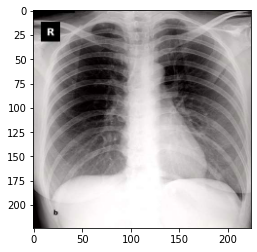

In [ ]:
X = []
Y = []

for label in images_path:
    for image_path in images_path[label]:
        image = cv2.imread(image_path)
        image = cv2.resize(image,(224, 224))
        X.append(image)
        Y.append(images_class[label])

plt.imshow(X[0])
plt.show()

In [ ]:
print(np.array(X).shape)
print(np.array(Y).shape)
print(Y[0])

(625, 224, 224, 3)
(625,)
0


# Build model

build model and get features

In [ ]:
x = np.array(X)
y = np.array(Y)


# initial pre trained model
pre_trained_models = {}
pre_trained_models["DenseNet169"] = DenseNet169(include_top=False, input_shape=(224, 224, 3), pooling="avg")


51888128/51877672 [==============================] - 1s 0us/step


In [ ]:
print(np.array(x).shape)

(625, 224, 224, 3)


# Split train and test data 

get futures from pre trained model

In [ ]:
features = pre_trained_models["DenseNet169"].predict(x)

# Classification

initial XGBoost classifier

In [ ]:
result = {}

XGB_Classifier = XGBClassifier(learning_rate=0.44, n_estimators=100, random_state=0, seed=0, gamma=0)

fit XGBoost classifier

In [ ]:
XGB_Classifier.fit(X_train, Y_train)

Y_pred = XGB_Classifier.predict(X_test)

print result

In [ ]:
result["Accuracy score"] = accuracy_score(Y_test, Y_pred)
result["confusion matrix"] = confusion_matrix(Y_test, Y_pred)
result["f1 score"] = f1_score(Y_test, Y_pred, average="macro")
result["precision score"] = precision_score(Y_test, Y_pred, average="macro")
result["Sensitivity"] = result["confusion matrix"][0,0] / (result["confusion matrix"][0,0] + result["confusion matrix"][0,1])
result["Specifity"] = result["confusion matrix"][1,1] / (result["confusion matrix"][1,0] + result["confusion matrix"][1,1])

print(f"\n============")
print(f"\nAccuracy score : ", result["Accuracy score"])
print(f"\nconfusion matrix : \n", result["confusion matrix"])
print(f"\nf1 score : ", result["f1 score"])
print(f"\nprecision score : ", result["precision score"])
print(f"\nSpecifity : ", result["Specifity"])
print(f"\nSensitivity : ", result["Sensitivity"])

In [ ]:
import sklearn
import pandas as pd

scoring = ['precision_macro', 'f1_macro', "accuracy"]

rs = 422
cv = KFold(n_splits=5, random_state=rs, shuffle=True)
scores = cross_validate(XGB_Classifier, features, np.array(y), cv=cv, scoring=scoring)
scr = pd.DataFrame(scores)
print(f"======== KFold random state {rs} ==========")
print(scr)
print("accuracy avg : ", scr["test_accuracy"].mean())

======== KFold random state 422 ==========
   fit_time  score_time  test_precision_macro  test_f1_macro  test_accuracy
0  1.727999    0.004671              0.995238       0.985413          0.992
1  1.701056    0.004517              0.995192       0.985957          0.992
2  1.703688    0.005025              0.994737       0.989158          0.992
3  1.636592    0.004747              0.953751       0.925000          0.952
4  1.689741    0.004466              0.990291       0.973359          0.984
accuracy avg :  0.9823999999999999


In [ ]:
from matplotlib import pyplot
f = 0

validiation_0_logloss = []
validiation_1_logloss = []
validiation_0_error = []
validiation_1_error = []
x_axis = 0
epochs = 0

for train_ix, test_ix in cv.split(features):
    # get data
    train_X, test_X = features[train_ix], features[test_ix]
    train_y, test_y = y[train_ix], y[test_ix]
    # fit model
    model = XGB_Classifier
    evalset = [(train_X, train_y), (test_X, test_y)]
    model.fit(train_X, train_y, eval_metric=["error", "logloss"], eval_set=evalset)
    # evaluate model
    yhat = model.predict(test_X)
    acc = accuracy_score(test_y, yhat)
    # store score
    print(f"\n confusion matrix fold {f}")
    f = f+1
    print(confusion_matrix(test_y, yhat))
    Y_test = test_y
    Y_pred = yhat


    # retrieve performance metrics
    results = model.evals_result()
    epochs += len(results['validation_0']['error'])
    x_axis = range(0, epochs)
    print(x_axis)
    validiation_0_logloss += results['validation_0']['logloss']
    validiation_1_logloss += results['validation_1']['logloss']
    validiation_0_error += results['validation_0']['error']
    validiation_0_error += results['validation_1']['error']

    result["Accuracy score"] = accuracy_score(Y_test, Y_pred)
    result["confusion matrix"] = confusion_matrix(Y_test, Y_pred)
    result["f1 score"] = f1_score(Y_test, Y_pred, average="macro")
    result["precision score"] = precision_score(Y_test, Y_pred, average="macro")
    result["Sensitivity"] = result["confusion matrix"][0,0] / (result["confusion matrix"][0,0] + result["confusion matrix"][0,1])
    result["Specifity"] = result["confusion matrix"][1,1] / (result["confusion matrix"][1,0] + result["confusion matrix"][1,1])

    print(f"\nAccuracy score : ", result["Accuracy score"])
    print(f"\nconfusion matrix : \n", result["confusion matrix"])
    print(f"\nf1 score : ", result["f1 score"])
    print(f"\nprecision score : ", result["precision score"])
    print(f"\nSpecifity : ", result["Specifity"])
    print(f"\nSensitivity : ", result["Sensitivity"])
    print(f"\n============")

In [ ]:
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(range(0, 500), validiation_0_logloss, label='Train')
ax.plot(range(0, 500), validiation_1_logloss, label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.savefig("logloss", format="svg")
pyplot.show()


# plot log loss
fig, ax = pyplot.subplots()
ax.plot(range(0, 1000), validiation_0_error, label='Train')
ax.plot(range(0, 0), validiation_1_error, label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.savefig("error", format="svg")
pyplot.show()